In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import sys, os

# Helpers
abspath = os.path.abspath
dirname = os.path.dirname
sep = os.sep

####
gen_folder = dirname(os.getcwd())
sys.path.append(gen_folder)

from src.utils import mining_data_tb as md 

In [4]:
m1_usa = md.read_data(r'../data/M1/m1_usa.parquet')
m2_usa = md.read_data(r'../data/M2/m2.parquet')
cpi_usa = md.read_data(r'../data/CPI/cpi.parquet')
pce_usa = md.read_data(r'../data/PCE/pce_adjusted.parquet')

In [6]:
processor = md.processor()

['#636EFA',
 '#EF553B',
 '#00CC96',
 '#AB63FA',
 '#FFA15A',
 '#19D3F3',
 '#FF6692',
 '#B6E880',
 '#FF97FF',
 '#FECB52']

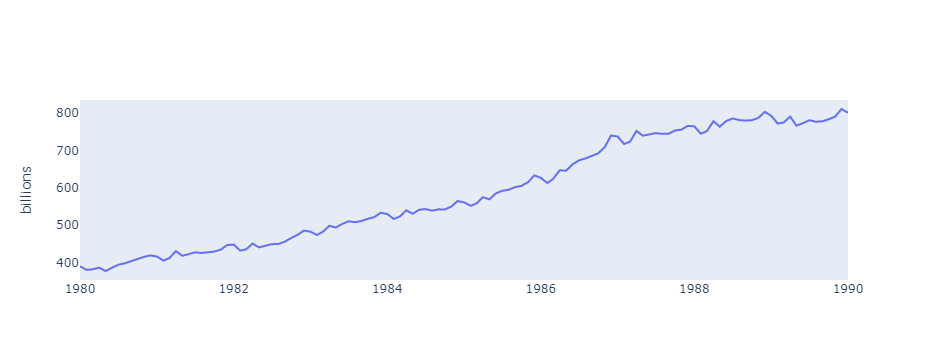

In [40]:
dict_ = {
    "dfs" : [m1_usa],
    "legends" : ["m1_usa"],
    "secondary_ys" : [False],
    "names" : ["billions"]
}


line_plotter(dict_, start_date = "1980-01-01", end_date = "1990-01-01", title = "", tickformat = "")

In [37]:

def line_plotter(dict_, start_date, end_date, title, tickformat, palette = False):
    dfs, legends, secondary_ys, names = dict_["dfs"], dict_["legends"], dict_["secondary_ys"], dict_["names"]
    # General settings
    start_date_str = str(start_date)
    end_date_str = str(end_date)
    palette_ = px.colors.qualitative.Plotly
    if palette:
        palette_ = palette

    fig = make_subplots()
    
    if any(secondary_ys):
        fig = make_subplots(specs = [[{"secondary_y" : True}]])

    # Iterate over
    for ind, df in enumerate(dfs):
        filtered_df = processor.filter_between_dates(df, start_date_str, end_date_str)
        fig.add_trace(go.Scatter(x = filtered_df.index, y = filtered_df["Value"], name = legends[ind], line = dict(color = palette_[ind])), secondary_y = secondary_ys[ind])
    
    # Layout
    fig.update_layout(title = title, xaxis_rangeslider_visible = False, title_font_size = 30)

    # Axes
    fig.update_xaxes(rangeslider_thickness = 0.1, showgrid = False)
    fig.update_yaxes(title_text = names[0], tickformat = tickformat, secondary_y = False, showgrid = False, zeroline = False)
    if len(names) > 1:
        fig.update_yaxes(title_text = names[1], tickformat = tickformat, secondary_y = True, showgrid = False, zeroline = False)

    return fig